In [1]:
from get_loader import get_loader
from models import Encoder, Decoder
import torch
import torch.nn as nn
from utils import *
from PIL import Image
from nltk.translate import bleu_score

In [2]:
image_path = '../../Data/train2017/train2017'
captions_path = '../../Data/annotations/captions_train2017.json'
idx2word_path = '../vocabulary/idx2word.json'
word2idx_path = '../vocabulary/word2idx.json'
freq_threshold = 5
caps_per_image = 1
batch_size = 32
shuffle = True
mode = 'test'

In [3]:
idx2word, word2idx = load_vocab(idx2word_path, word2idx_path)

In [4]:
test_loader_params = {
    'images_path': image_path,
    'captions_path': captions_path,
    'freq_threshold': freq_threshold,
    'caps_per_image': 1,
    'batch_size': 1,
    'shuffle': shuffle,
    'mode': mode,
    'idx2word': idx2word,
    'word2idx': word2idx
}

test_loader, test_dataset = get_loader(**test_loader_params)

In [5]:
len(test_loader)

2000

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Model 1

In [7]:
param_1 = load_params('../model/model_v2/model_v2_0_param.json')

In [8]:
param_1

{'batch_size': 32,
 'embed_size': 512,
 'hidden_size': 512,
 'num_layers': 1,
 'vocab_size': 3387}

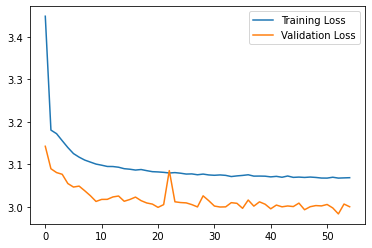

In [9]:
# for data loader
BATCH_SIZE = 1

# for encoder and decoder
EMBED_SIZE = param_1['embed_size'] # dimension of vocab embedding vector
HIDDEN_SIZE = param_1['hidden_size']
NUM_LAYERS = param_1['num_layers'] #hidden layers in LTSM
vocab_size = param_1['vocab_size']

TOTAL_EPOCH = 15
CHECKPOINT = '../model/model_v2/model_v2_0.pth'

encoder = Encoder(embed_size=EMBED_SIZE, pretrained=True)
decoder = Decoder(embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, vocab_size=vocab_size, num_layers=NUM_LAYERS)

epoch, encoder, decoder, training_loss, validation_loss = load_model(encoder, decoder, CHECKPOINT)

plot_loss(training_loss, validation_loss)

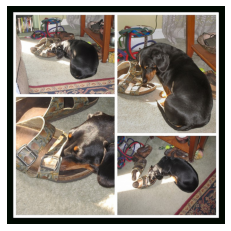

a dog is laying on a bed with a dog .
Original Captions:
The four images show a black dog next to a pair of shoes.
This montage shows several pictures of a dog
a dog laying resting next to a pile of shoes
A puppy is sniffing the inside of a shoe in a house.
An adorable black and tan dog sniffs a pair of leather sandals.


In [10]:
idx, images, captions = next(iter(test_loader))
img = Image.open(image_path+'/'+test_dataset.img_deque[idx[0]][0]).convert('RGB')
plt.imshow(img)
hypo = predict(encoder, decoder, img, test_dataset.vocab.idx2word, test_dataset.vocab.word2idx,device)
references = test_dataset.get_captions(test_dataset.img_deque[idx[0]][0])
print("Original Captions:")
for ref in references:
    print(ref)

In [11]:
b1_avg, b2_avg, b3_avg, b4_avg = evaluate_bleu_score(encoder, decoder, test_loader, test_dataset, device)

/opt/conda/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


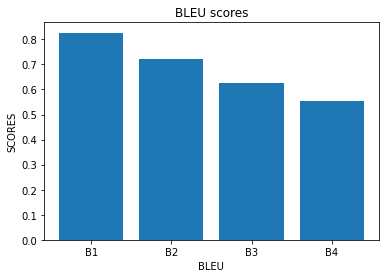

In [12]:
plot_bleu_score_bar(b1_avg, b2_avg, b3_avg, b4_avg)

## Model 2

In [13]:
param_2 = load_params('../model/model_v2/model_v2_1_param.json')

In [14]:
param_2

{'batch_size': 128,
 'embed_size': 1024,
 'hidden_size': 512,
 'num_layers': 3,
 'vocab_size': 3387}

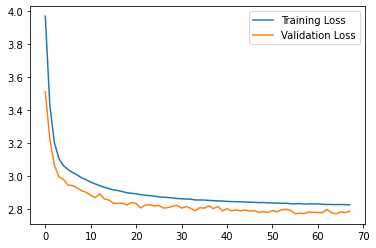

In [15]:
# for encoder and decoder
EMBED_SIZE = param_2['embed_size'] # dimension of vocab embedding vector
HIDDEN_SIZE = param_2['hidden_size']
NUM_LAYERS = param_2['num_layers'] #hidden layers in LTSM
vocab_size = param_2['vocab_size']

CHECKPOINT = '../model/model_v2/model_v2_1.pth'

encoder = Encoder(embed_size=EMBED_SIZE, pretrained=True)
decoder = Decoder(embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, vocab_size=vocab_size, num_layers=NUM_LAYERS)
epoch, encoder, decoder, training_loss, validation_loss = load_model(encoder, decoder, CHECKPOINT)
plot_loss(training_loss, validation_loss)

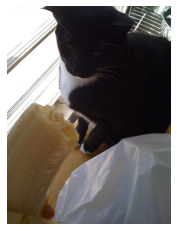

a cat is sitting on a sink next to a sink .
Original Captions:
A person holding a banana near a cat.
A cat sitting up on top of a cluttered counter
A black and white cat is looking at a banana.
A black cat sitting in front of a banana.
A very cute black and white cat by a window.


In [16]:
idx, images, captions = next(iter(test_loader))
img = Image.open(image_path+'/'+test_dataset.img_deque[idx[0]][0]).convert('RGB')
plt.imshow(img)
hypo = predict(encoder, decoder, img, test_dataset.vocab.idx2word, test_dataset.vocab.word2idx,device)
references = test_dataset.get_captions(test_dataset.img_deque[idx[0]][0])
print("Original Captions:")
for ref in references:
    print(ref)

In [17]:
b1_avg, b2_avg, b3_avg, b4_avg = evaluate_bleu_score(encoder, decoder, test_loader, test_dataset, device)

/opt/conda/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


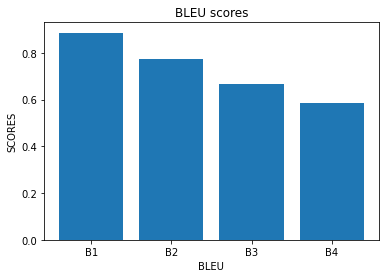

In [18]:
plot_bleu_score_bar(b1_avg, b2_avg, b3_avg, b4_avg)